In [1]:
%load_ext autoreload
%autoreload 2
import requests
import io
from pymolint import  struct_int
# import numpy as np
# import sys
# from seqplot.p9tools import 
import MDAnalysis as mda
from seqplot.pdb_plot import plot_prof4pdb

ModuleNotFoundError: No module named 'seqplot'

In [9]:
h=io.StringIO(requests.get('https://files.rcsb.org/download/1KX5.pdb').content.decode("utf-8") )

In [10]:
struct=mda.Universe(h,format='PDB')

/opt/miniconda3/envs/moldyn/lib/python3.7/site-packages/MDAnalysis/topology/guessers.py:80: UserWarning: Failed to guess the mass for the following atom types: MN
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


In [11]:
d=struct_int.struct2cont(struct,'segid B and protein')

In [12]:
df=d.get_df()

In [13]:
dp=d.get_num_int_profile()

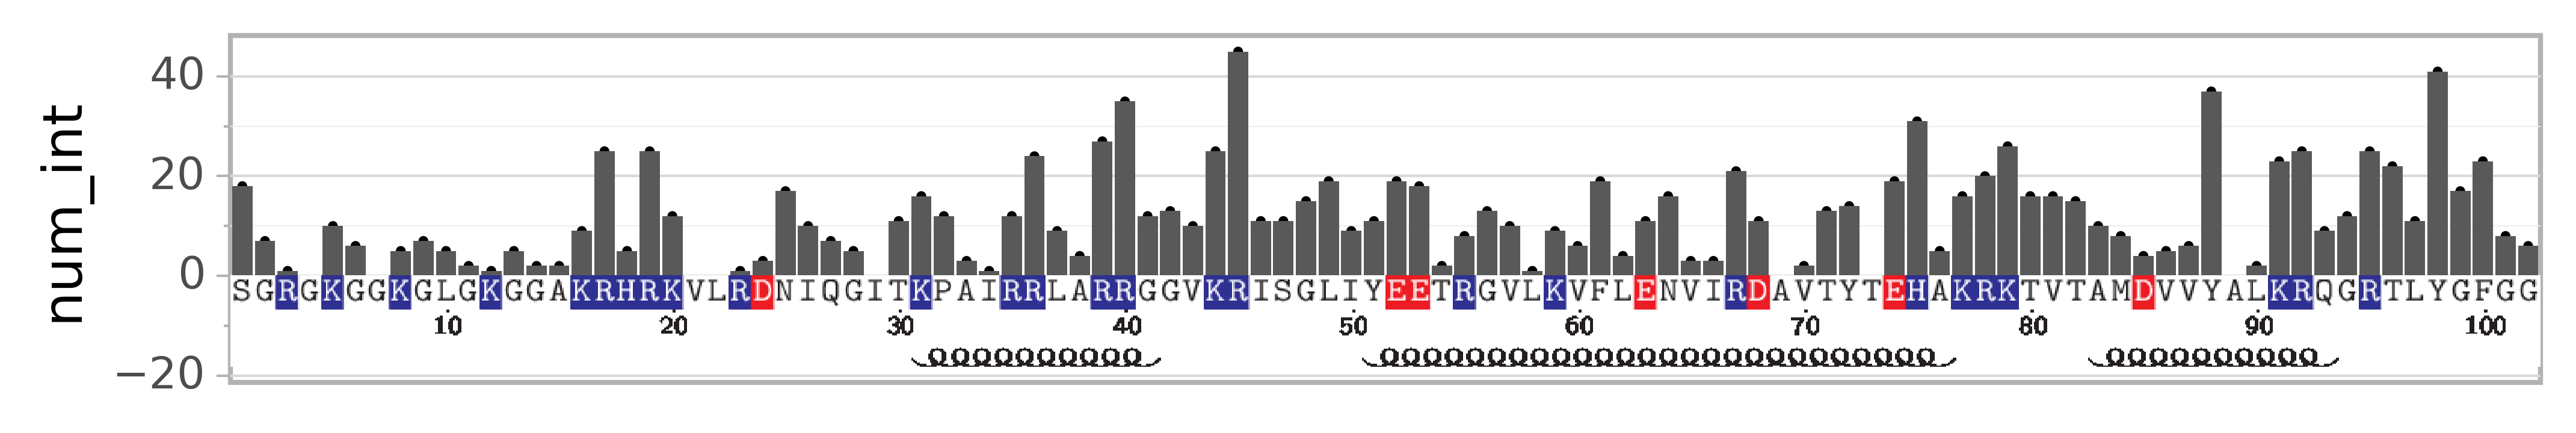

<ggplot: (8776356056335)>

In [15]:
plot_prof4pdb(pdbchid='1KX5_B',column='num_int',data=dp,ymin=0)